In [1]:
# Look in header to find the date and time in the format "YYYY-MM-DDT00:00:00.000". What is it labeled as?
# In this fits file, it is labeled as 'DATE-OBS'

from astropy.io import fits

hdul = fits.open('WASP-12b/WASP-12b_00040_bsdf.fits')
print(hdul[0].header)

SIMPLE  =                    T / Created by ImageJ FITS_Writer                  BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 4096 / length of data axis 1                          NAXIS2  =                 4096 / length of data axis 2                          BZERO   = 32768.0              / data range offset                              BSCALE  = 1.0                  / scaling factor                                 EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H EXPTIME =                 100. / exposure time (seconds)                        DATE-OBS= '2013-01-27T00:20:02.588' / date of observation (UT)                  IMAGETYP= 'Light Frame'        / image t

In [2]:
# Extract that date, and convert it to Julian Date

from astropy.time import Time

# Use 'DATE-OBS' in this line, because that is what we found in the header
date = hdul[0].header['DATE-OBS']
julian_date = Time(date, format = 'isot', scale = 'utc').jd 

print(f"The Julian Date is {julian_date}")

The Julian Date is 2456319.5139188427


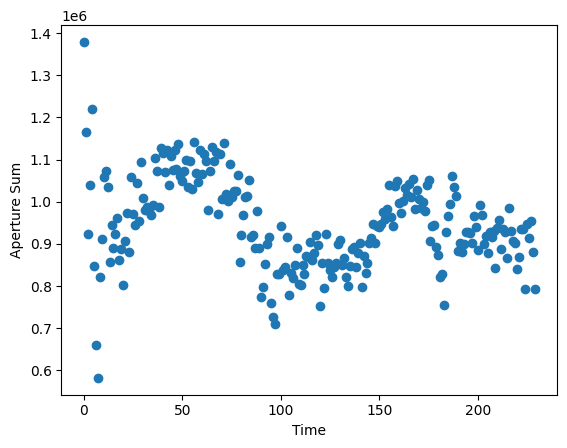

In [3]:
'''Code carried over from L4_light-curve-modeling.ipynb'''

fits_files = []
for i in range(40, 100, 1):
    fits_files.append(f'WASP-12b/WASP-12b_000{i}_bsdf.fits')
for i in range(100, 270, 1):
    fits_files.append(f'WASP-12b/WASP-12b_00{i}_bsdf.fits')    
fits_data = []    
for fits_file in fits_files:
    file_data = fits.open(fits_file)
    image_data = file_data[0].data
    fits_data.append(image_data)
from photutils.aperture import CircularAperture
position = [2401.93, 2086.15]
aperture = CircularAperture(position,r=10.0)
from photutils.aperture import aperture_photometry
star_data = []
for file in fits_data:
    star_data.append(aperture_photometry(file,aperture)['aperture_sum'])
import matplotlib.pyplot as plt
plt.plot(star_data, 'o')
plt.ylabel('Aperture Sum')
plt.xlabel('Time')
plt.show()

In [5]:
''' Extract julian date from each fits image and append it to a list'''

# define empty list
jds = []

# for each fits file, extract the julian date and append to jds
# this list of fits file names was created in lesson 4
for fits_file in fits_files:
    file_data = fits.open(fits_file)
    date = file_data[0].header['DATE-OBS']
    julian_date = Time(date, format = 'isot', scale = 'utc').jd
    jds.append(julian_date)

print(jds)

[2456319.5139188427, 2456319.515297882, 2456319.5166770834, 2456319.5180562385, 2456319.519435428, 2456319.520814792, 2456319.5221939585, 2456319.523573125, 2456319.524952303, 2456319.526331389, 2456319.527710463, 2456319.529089618, 2456319.5304687847, 2456319.5318478704, 2456319.533227049, 2456319.5346062267, 2456319.535985405, 2456319.5373645835, 2456319.538743727, 2456319.5401228126, 2456319.5415019905, 2456319.542881169, 2456319.5442602546, 2456319.545639433, 2456319.5470186113, 2456319.5483977315, 2456319.549776875, 2456319.551155984, 2456319.5525351157, 2456319.55391419, 2456319.5552933333, 2456319.5566724306, 2456319.558051528, 2456319.559430683, 2456319.5608098265, 2456319.562189005, 2456319.56356816, 2456319.564947361, 2456319.566326447, 2456319.5677055903, 2456319.5690847686, 2456319.570463912, 2456319.571843044, 2456319.5732221873, 2456319.574601308, 2456319.5759804165, 2456319.5773595604, 2456319.5787387155, 2456319.5801179167, 2456319.581497141, 2456319.582876308, 2456319.

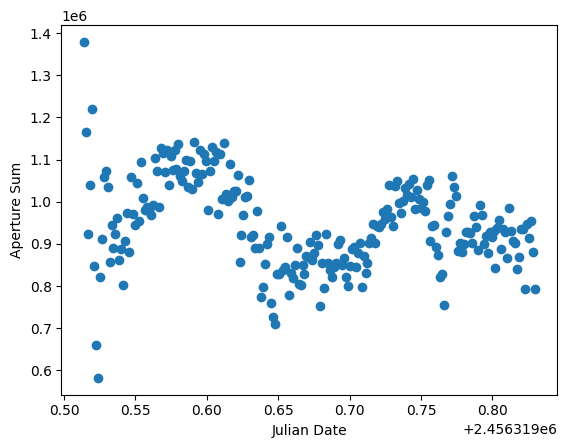

In [6]:
# Make new plot with julian dates on the x-axis

plt.plot(jds, star_data, 'o')
plt.ylabel('Aperture Sum')
plt.xlabel('Julian Date')
plt.show()